# Testing Params:
- ML framework (tf, pt)
- Model type (yolo, resnet, vgg)
    -    yolo
    -    resnet  
    -    vgg
- Length of test
    -short (300s or 5mins)
    -long?
- number of threads
    -    1	
    -    2
    -    4
    -    8    
- DPU config
    -    VCK50004PE/ (DWC + MISC)
    -    VCK50006PEDWC/  
    -    VCK50006PEMISC/ 
    -    VCK50008PE/


# Testing Results:
- Power + temp
- FPS
- E2E_MEAN and DPU_MEAN (sometimes)

# PROCESSING CODE:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean, start_time = 25, test_duration = 300, buffer = 15):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # RESULTS
    total_frames = fps * test_duration

    # Time conversion (found experimentally, it accounts for the time delay in the csv data collection script)
    factor = 2.14

    # Rename the 'Unnamed: 0' column to 'Time (s)_value'
    df.rename(columns={'Unnamed: 0': 'Time (s)_value'}, inplace=True)

    # Fix time
    df.index *= factor
    df['Time (s)_value'] *= factor

    # Filter data for the test period and after the test
    df_in_test = df[df['Time (s)_value'].between(start_time + buffer, start_time + test_duration - buffer)]
    df_after_test = df[df['Time (s)_value'] > (start_time + test_duration + buffer)]

    total_test_energy = df_in_test['Power (Watts)_value'].sum()
    average_test_power = df_in_test['Power (Watts)_value'].mean()
    average_idle_power = df_after_test['Power (Watts)_value'].mean()

    average_additional_power = average_test_power - average_idle_power
    total_additional_energy = average_additional_power * test_duration
    energy_per_frame = total_additional_energy / total_frames

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot power values
    plt.plot(df['Power (Watts)_value'], label='Power')

    # Add vertical dotted lines for start and end times
    plt.axvline(x=start_time, color='r', linestyle='--', label='Start Time')
    # plt.axvline(x=start_time+buffer, color='r', linestyle='--', label='Buffered Start Time')
    plt.axvline(x=start_time + test_duration, color='g', linestyle='--', label='End Time')
    # plt.axvline(x=start_time + test_duration - buffer, color='g', linestyle='--', label='Buffered End Time')

    # Add horizontal lines for average powers
    plt.axhline(y=average_test_power, color='b', linestyle='--', label='Average Test Power')
    plt.axhline(y=average_idle_power, color='y', linestyle='--', label='Average Idle Power')

    # Customize the plot
    plt.title(f'Performance Test for {model_description} (FPS: {fps}, Energy per Frame: {energy_per_frame:.4f} Joules/Frame)')
    plt.xlabel('Time (s)')
    plt.ylabel('Power (Watts)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

    # print("Total Energy during the test:", total_test_energy, "Joules")
    # print("Average Power during the test:", average_test_power, "Watts")
    # print("Average Power not during the test:", average_idle_power, "Watts")
    # print("Average Extra Power during the test:", average_additional_power, "Watts")
    # print("Total Extra Energy during the test:", total_additional_energy, "Joules")
    print("Average Power per Frame", energy_per_frame, "Joules/Frame")
    print("e2e", e2e_mean)
    print("dpu", dpu_mean)

    return energy_per_frame


# YOLOv3

## DPU: 4PE

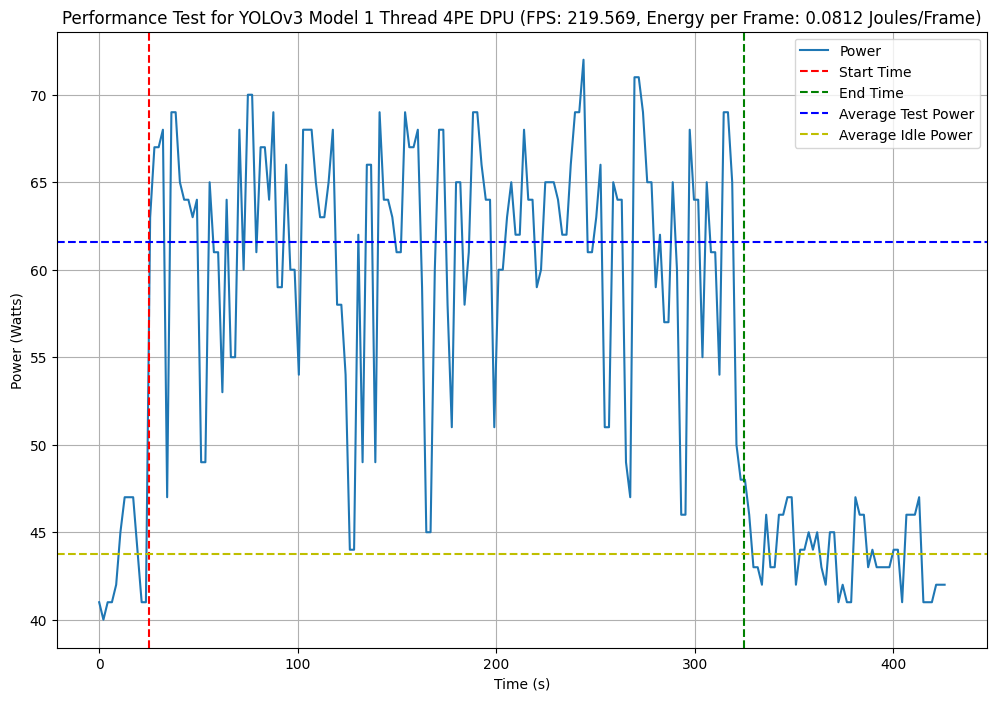

Average Power per Frame 0.08124617106359498 Joules/Frame
e2e 18193.1
dpu 1.0547


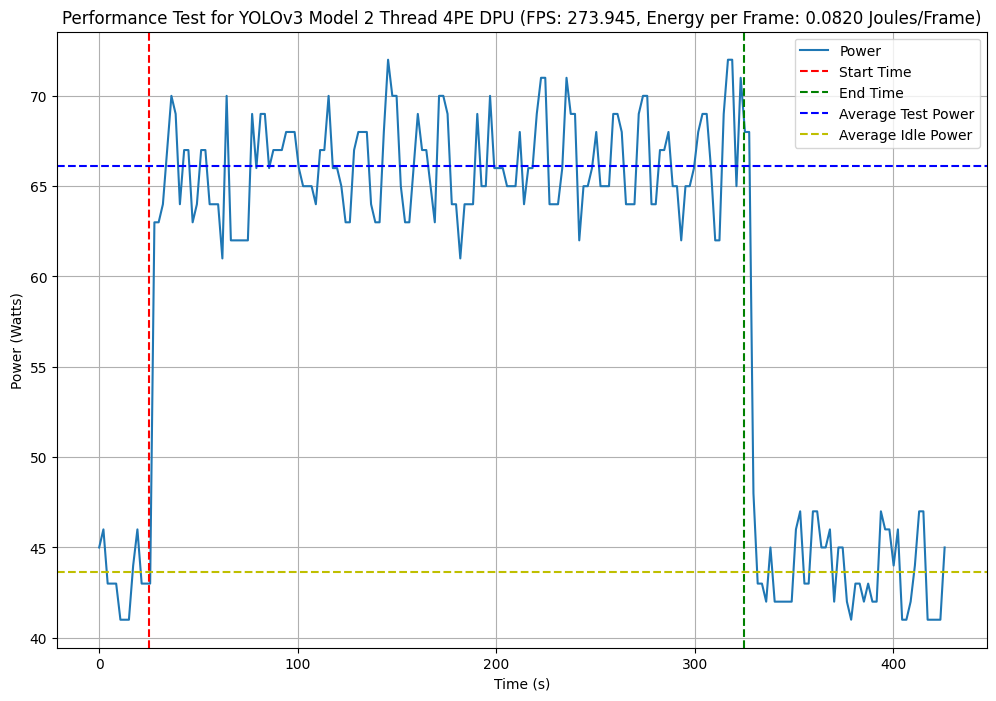

Average Power per Frame 0.08202021669207758 Joules/Frame
e2e 0
dpu 0


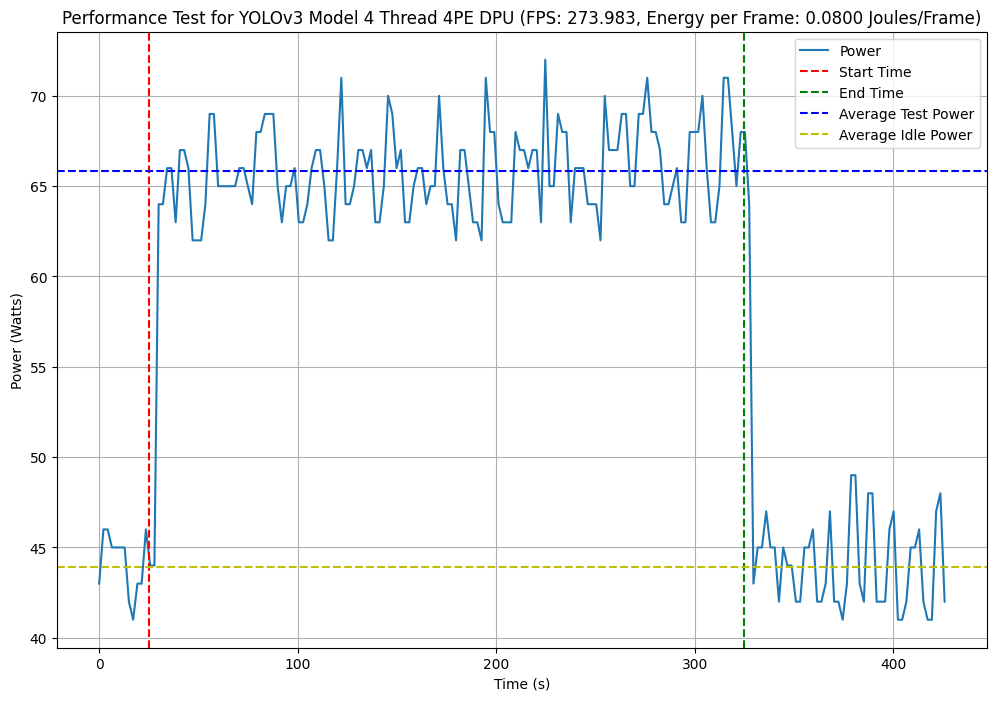

Average Power per Frame 0.07998467267303866 Joules/Frame
e2e 0
dpu 0


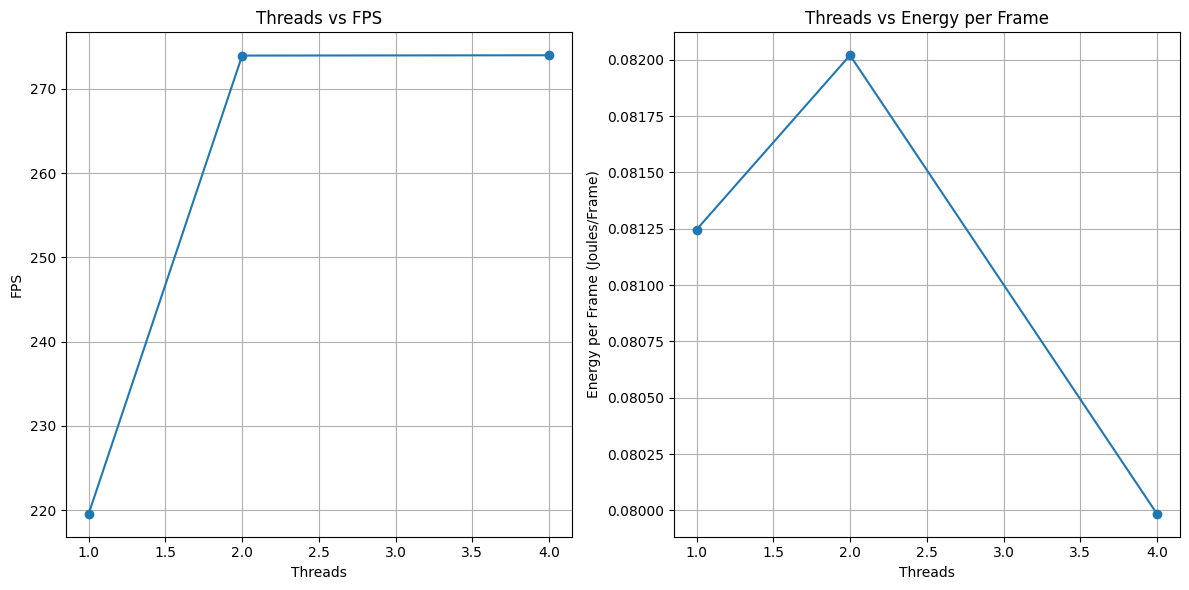

In [4]:
# threads = [1,2,4,8]
threads = [1,2,4]
fps_list_4PE = []
energy_per_frame_list_4PE = []


# TEST INFO
file_path = 'data/tf_yolov3_300_1_4PE.csv'
model_description = 'YOLOv3 Model 1 Thread 4PE DPU'
# RESULTS
fps = 219.569
e2e_mean = 18193.1
dpu_mean = 1.0547
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE.append(fps)
energy_per_frame_list_4PE.append(energy_per_frame)



# TEST INFO
file_path = 'data/tf_yolov3_300_2_4PE.csv'
model_description = 'YOLOv3 Model 2 Thread 4PE DPU'
# RESULTS
fps = 273.945
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE.append(fps)
energy_per_frame_list_4PE.append(energy_per_frame)


# TEST INFO
file_path = 'data/tf_yolov3_300_4_4PE.csv'
model_description = 'YOLOv3 Model 4 Thread 4PE DPU'
# RESULTS
fps = 273.983
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE.append(fps)
energy_per_frame_list_4PE.append(energy_per_frame)

# Uncomment the follwoing code to see 8 thread results, note that it is basically the same as 4 threads
# # TEST INFO
# file_path = 'data/tf_yolov3_300_8_4PE.csv'
# model_description = 'YOLOv3 Model 8 Thread 4PE DPU'
# # RESULTS
# fps = 274.01
# e2e_mean = 0
# dpu_mean = 0
# energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
# fps_list_4PE.append(fps)
# energy_per_frame_list_4PE.append(energy_per_frame)




# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_4PE, marker='o', linestyle='-')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_4PE, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# YOLOv3

## DPU: 6PEDWC

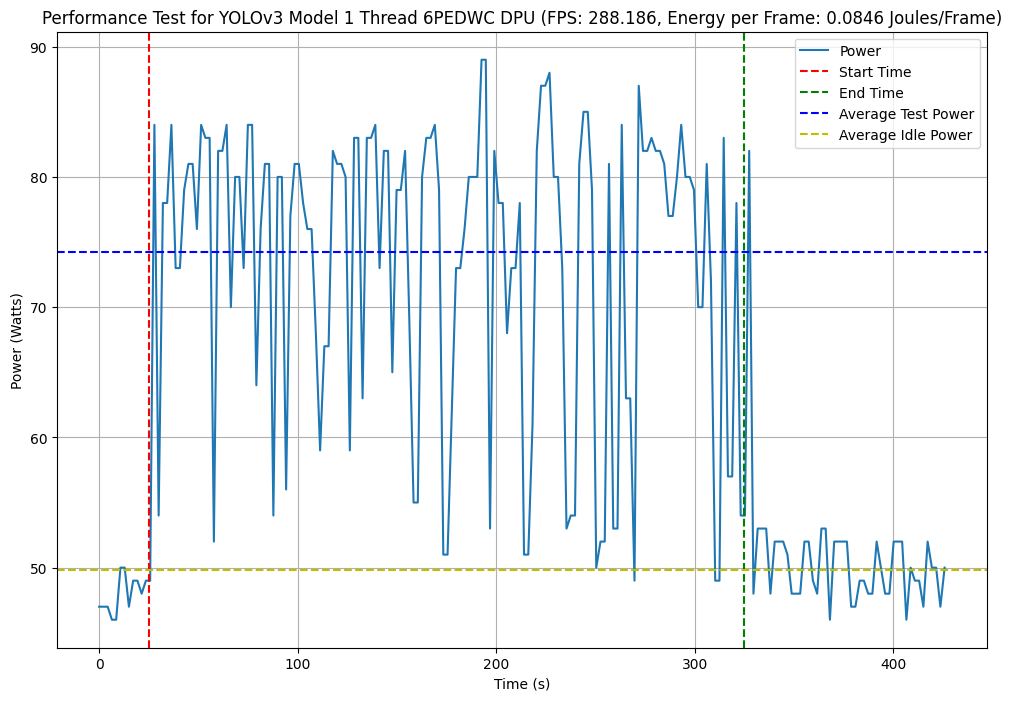

Average Power per Frame 0.08455845768231929 Joules/Frame
e2e 20818.9
dpu 1.18043


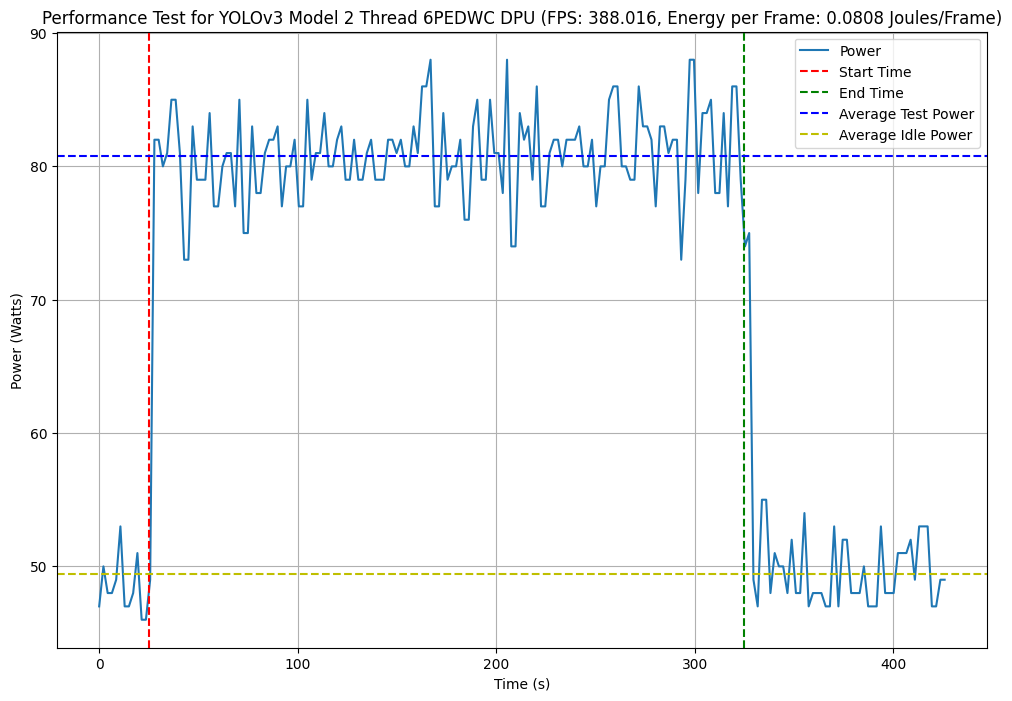

Average Power per Frame 0.08076665237395847 Joules/Frame
e2e 0
dpu 0


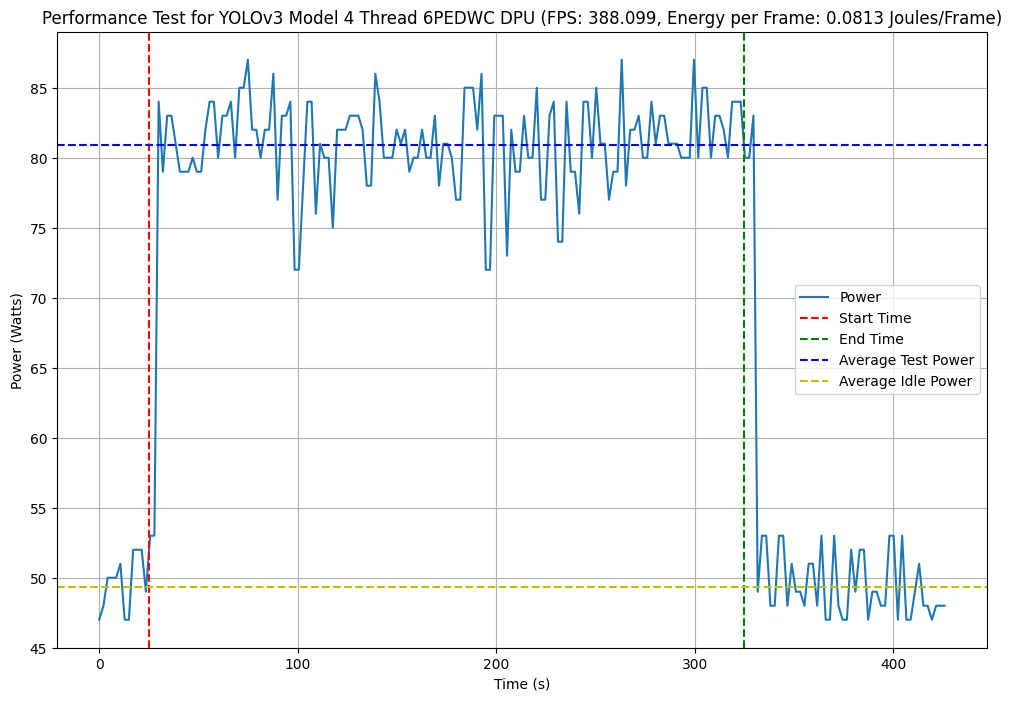

Average Power per Frame 0.08134690962350162 Joules/Frame
e2e 0
dpu 0


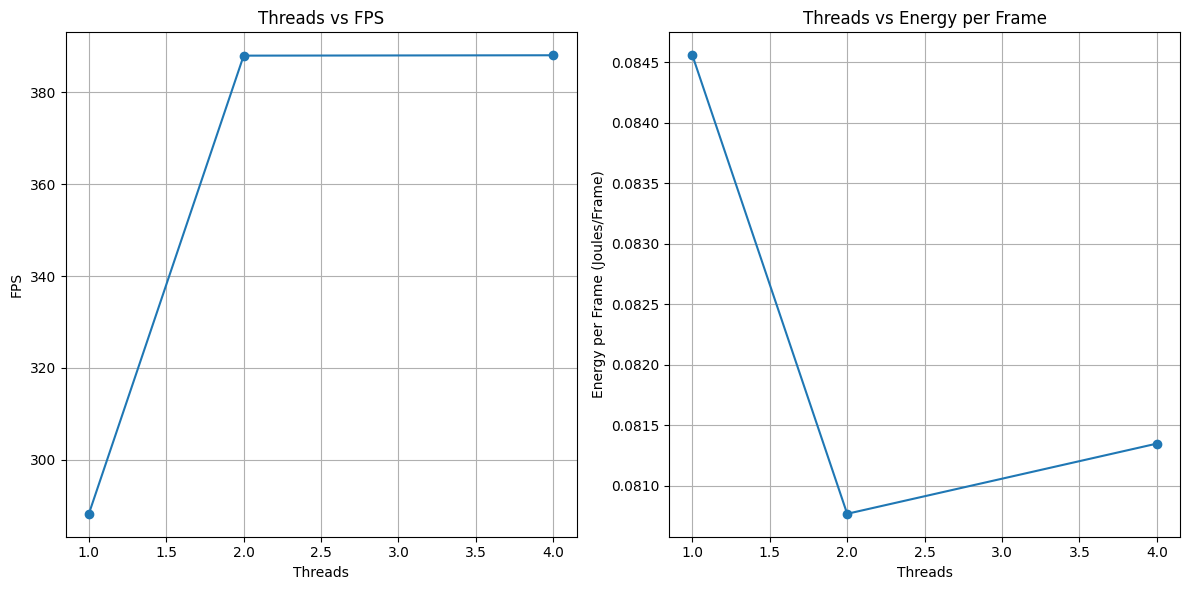

In [5]:
threads = [1, 2, 4]
fps_list_6PEDWC = []
energy_per_frame_list_6PEDWC = []

# TEST 1
file_path = 'data/tf_yolov3_300_1_6PEDWC.csv'
model_description = 'YOLOv3 Model 1 Thread 6PEDWC DPU'
fps = 288.186
e2e_mean = 20818.9
dpu_mean = 1.18043
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEDWC.append(fps)
energy_per_frame_list_6PEDWC.append(energy_per_frame)

# TEST 2
file_path = 'data/tf_yolov3_300_2_6PEDWC.csv'
model_description = 'YOLOv3 Model 2 Thread 6PEDWC DPU'
fps = 388.016
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEDWC.append(fps)
energy_per_frame_list_6PEDWC.append(energy_per_frame)

# TEST 3
file_path = 'data/tf_yolov3_300_4_6PEDWC.csv'
model_description = 'YOLOv3 Model 4 Thread 6PEDWC DPU'
fps = 388.099
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEDWC.append(fps)
energy_per_frame_list_6PEDWC.append(energy_per_frame)

# Uncomment the follwoing code to see 8 thread results, note that it is basically the same as 4 threads
# # TEST 4
# file_path = 'data/tf_yolov3_300_8_6PEDWC.csv'
# model_description = 'YOLOv3 Model 8 Thread 6PEDWC DPU'
# fps = 388.0675
# e2e_mean = 0
# dpu_mean = 0
# energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
# fps_list_6PEDWC.append(fps)
# energy_per_frame_list_6PEDWC.append(energy_per_frame)

# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_6PEDWC, marker='o', linestyle='-')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_6PEDWC, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# YOLOv3

## DPU: 6PEMISC

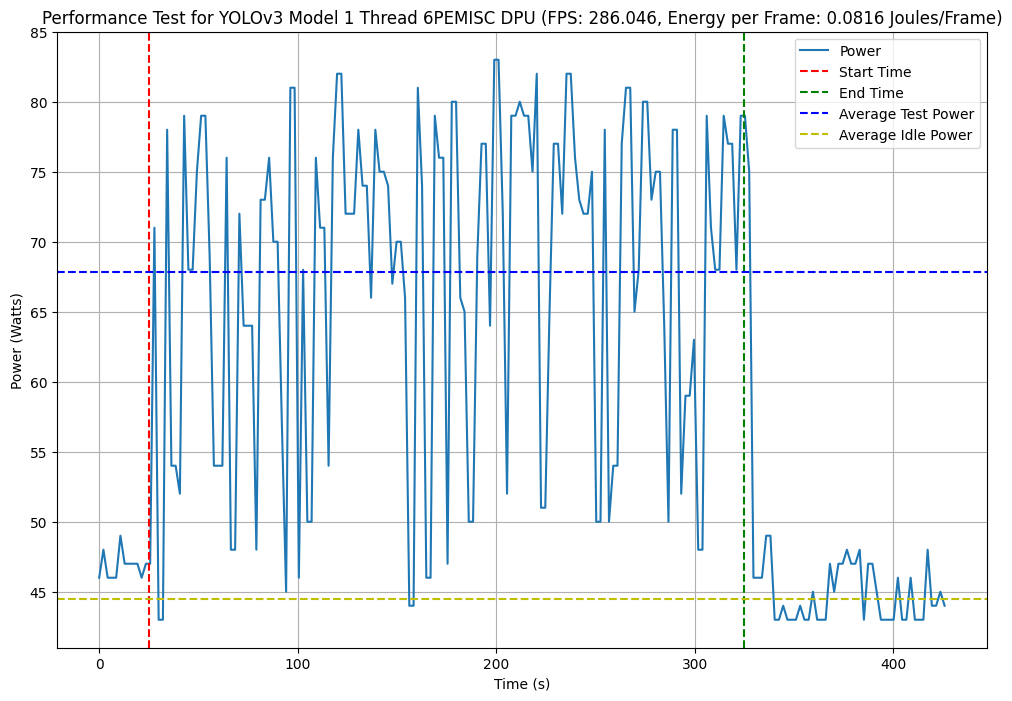

Average Power per Frame 0.08158481932016225 Joules/Frame
e2e 20948.3
dpu 1.09315


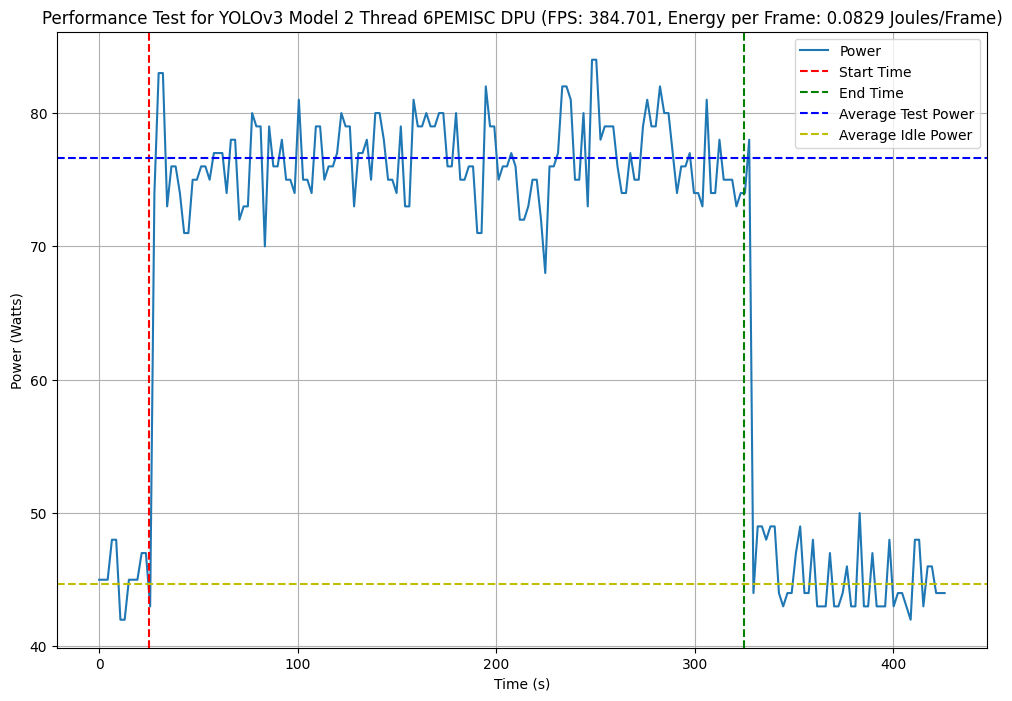

Average Power per Frame 0.08291077363979785 Joules/Frame
e2e 0
dpu 0


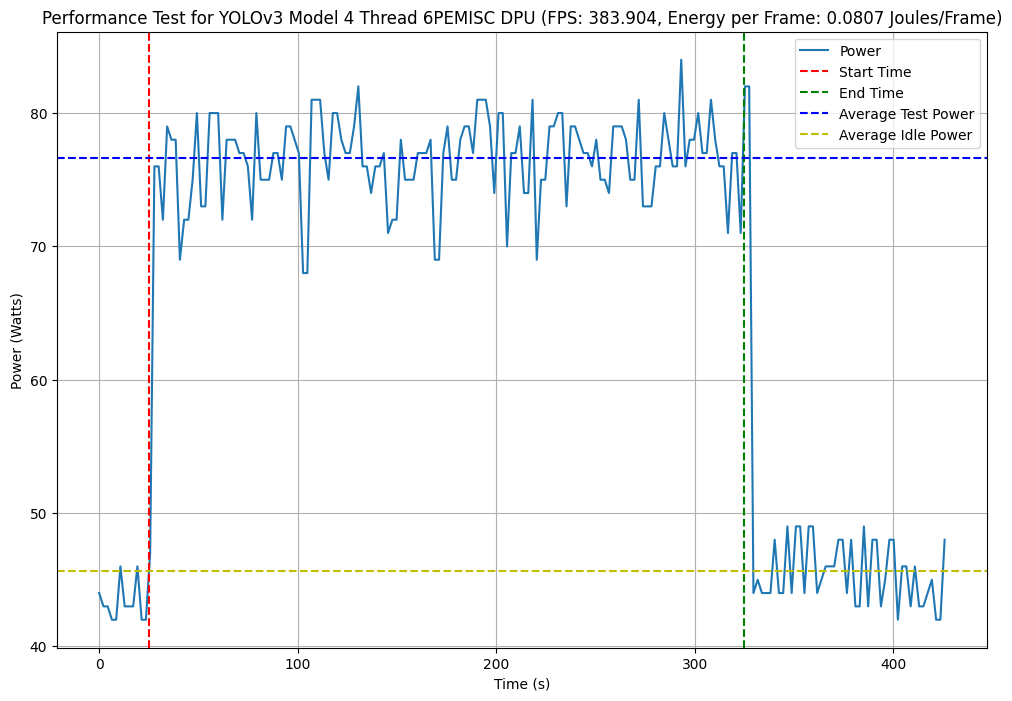

Average Power per Frame 0.08068783875540443 Joules/Frame
e2e 0
dpu 0


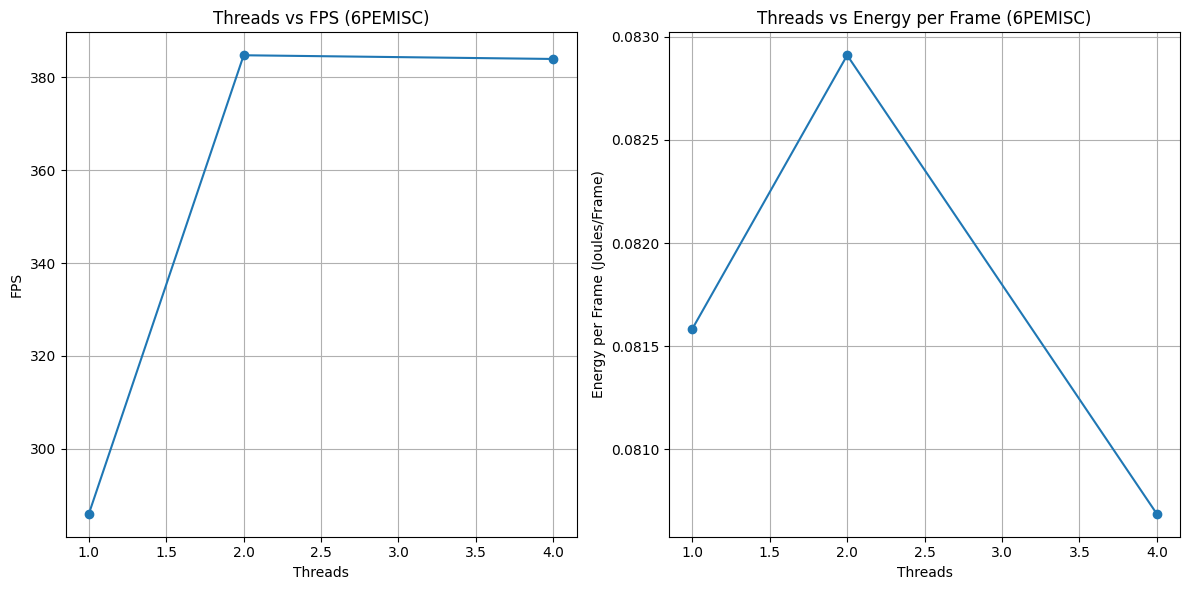

In [6]:
import matplotlib.pyplot as plt

threads = [1, 2, 4]
fps_list_6PEMISC = []
energy_per_frame_list_6PEMISC = []

# TEST 1
file_path = 'data/tf_yolov3_300_1_6PEMISC.csv'
model_description = 'YOLOv3 Model 1 Thread 6PEMISC DPU'
fps = 286.046
e2e_mean = 20948.3
dpu_mean = 1.09315
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEMISC.append(fps)
energy_per_frame_list_6PEMISC.append(energy_per_frame)

# TEST 2
file_path = 'data/tf_yolov3_300_2_6PEMISC.csv'
model_description = 'YOLOv3 Model 2 Thread 6PEMISC DPU'
fps = 384.701
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEMISC.append(fps)
energy_per_frame_list_6PEMISC.append(energy_per_frame)

# TEST 3
file_path = 'data/tf_yolov3_300_4_6PEMISC.csv'
model_description = 'YOLOv3 Model 4 Thread 6PEMISC DPU'
fps = 383.904
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEMISC.append(fps)
energy_per_frame_list_6PEMISC.append(energy_per_frame)

# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_6PEMISC, marker='o', linestyle='-')
plt.title('Threads vs FPS (6PEMISC)')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_6PEMISC, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame (6PEMISC)')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# YOLOv3

## DPU: 8PE

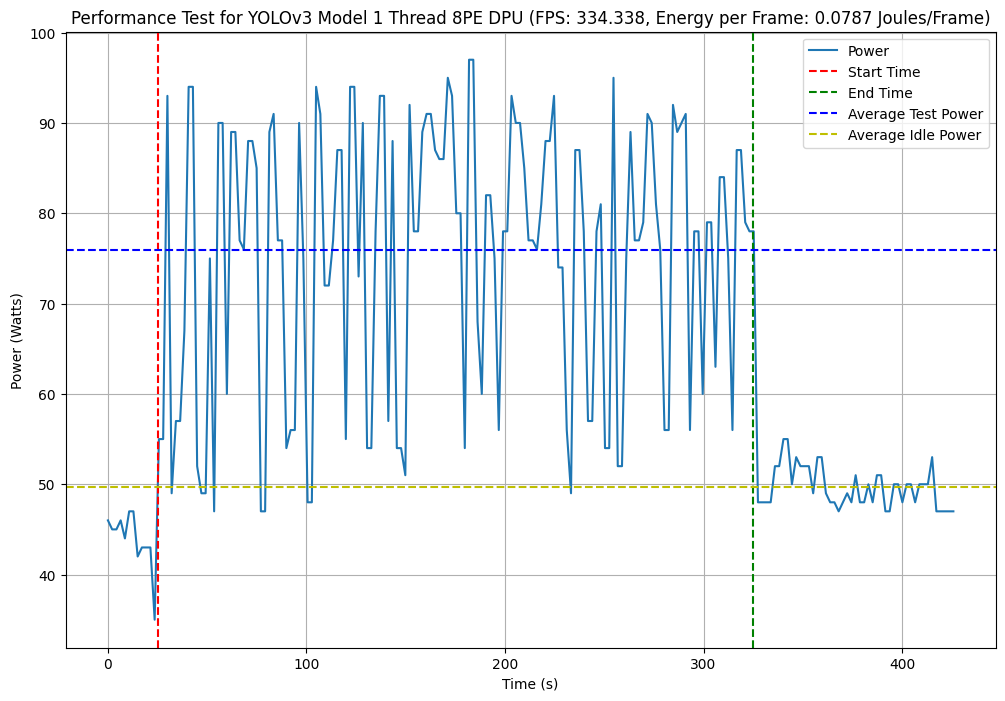

Average Power per Frame 0.07866823655986338 Joules/Frame
e2e 23926.8
dpu 1.12418


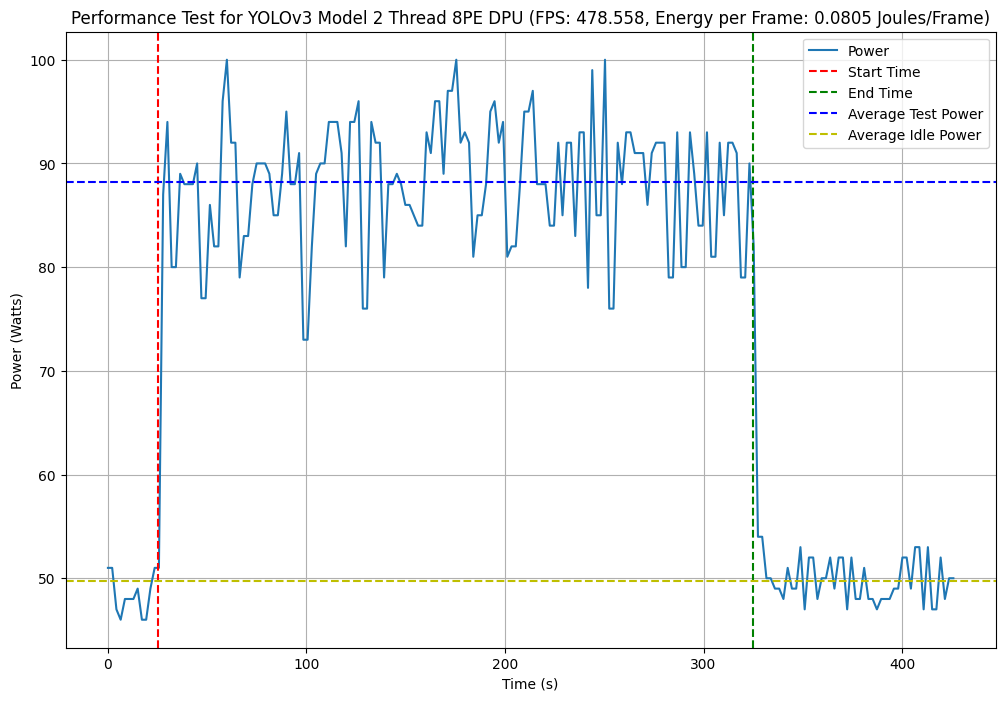

Average Power per Frame 0.08053091719887874 Joules/Frame
e2e 0
dpu 0


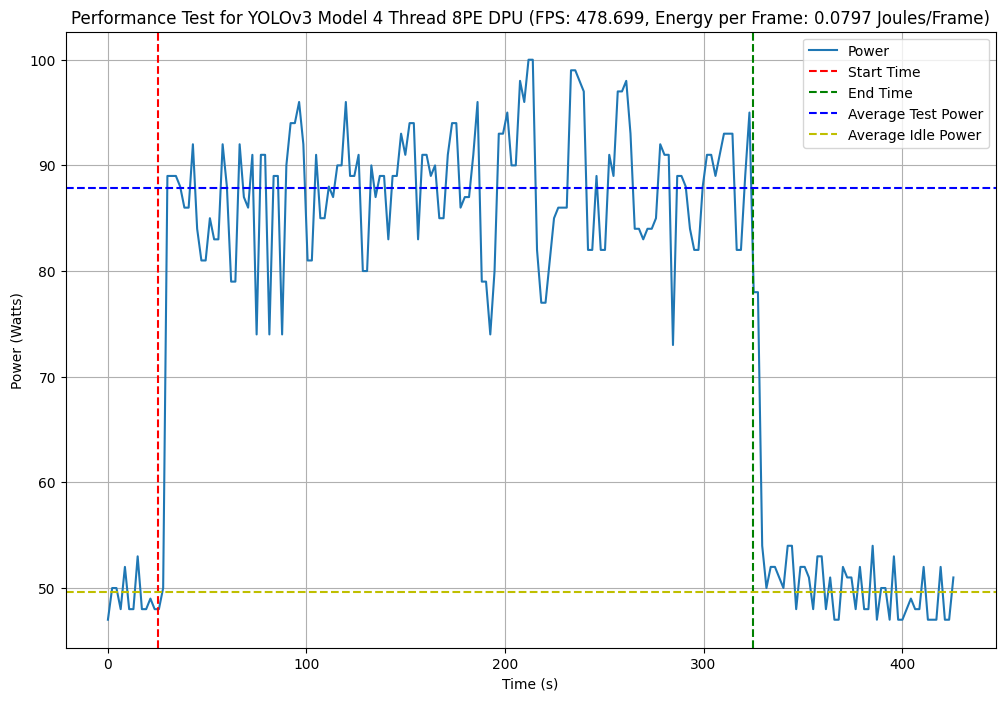

Average Power per Frame 0.07971381542909942 Joules/Frame
e2e 0
dpu 0


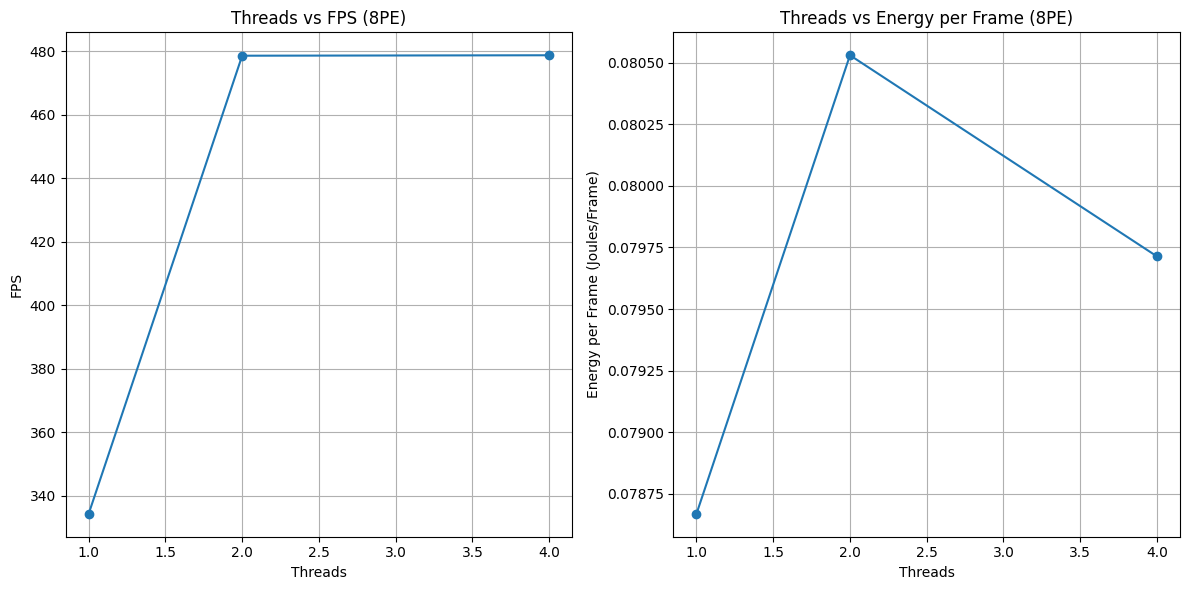

In [7]:
import matplotlib.pyplot as plt

threads = [1, 2, 4]
fps_list_8PE = []
energy_per_frame_list_8PE = []

# TEST 1
file_path = 'data/tf_yolov3_300_1_8PE.csv'
model_description = 'YOLOv3 Model 1 Thread 8PE DPU'
fps = 334.338
e2e_mean = 23926.8
dpu_mean = 1.12418
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_8PE.append(fps)
energy_per_frame_list_8PE.append(energy_per_frame)

# TEST 2
file_path = 'data/tf_yolov3_300_2_8PE.csv'
model_description = 'YOLOv3 Model 2 Thread 8PE DPU'
fps = 478.558
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_8PE.append(fps)
energy_per_frame_list_8PE.append(energy_per_frame)

# TEST 3
file_path = 'data/tf_yolov3_300_4_8PE.csv'
model_description = 'YOLOv3 Model 4 Thread 8PE DPU'
fps = 478.699
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_8PE.append(fps)
energy_per_frame_list_8PE.append(energy_per_frame)

# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_8PE, marker='o', linestyle='-')
plt.title('Threads vs FPS (8PE)')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_8PE, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame (8PE)')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


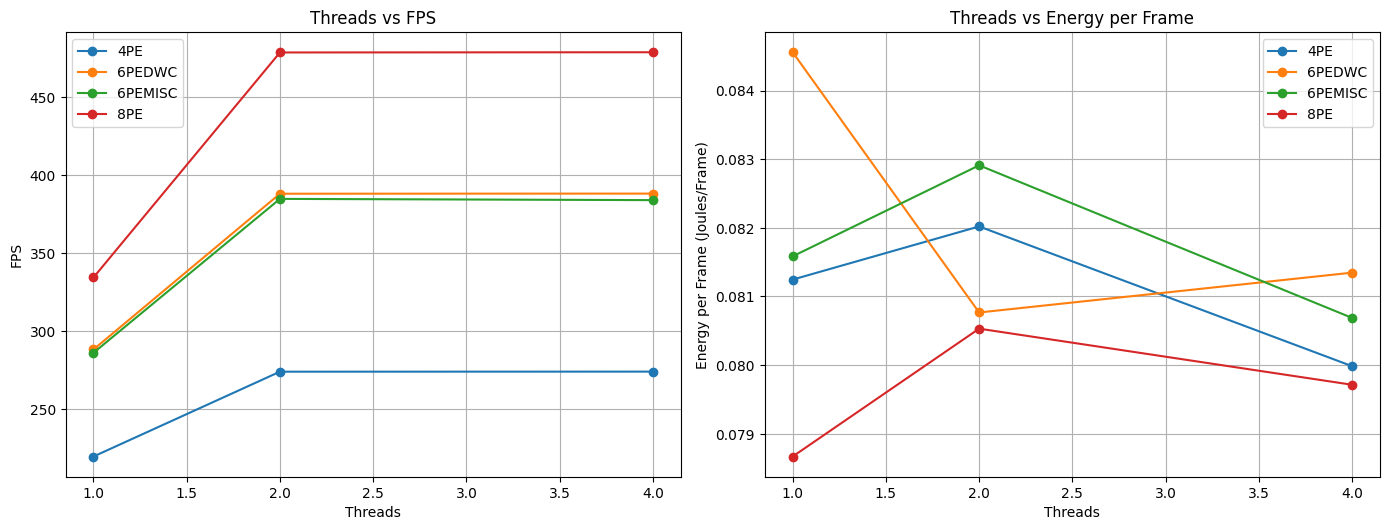

In [8]:
plt.figure(figsize=(14, 10))

# Plotting threads vs FPS
plt.subplot(2, 2, 1)
plt.plot(threads, fps_list_4PE, marker='o', linestyle='-', label='4PE')
plt.plot(threads, fps_list_6PEDWC, marker='o', linestyle='-', label='6PEDWC')
plt.plot(threads, fps_list_6PEMISC, marker='o', linestyle='-', label='6PEMISC')
plt.plot(threads, fps_list_8PE, marker='o', linestyle='-', label='8PE')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.legend()
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(2, 2, 2)
plt.plot(threads, energy_per_frame_list_4PE, marker='o', linestyle='-', label='4PE')
plt.plot(threads, energy_per_frame_list_6PEDWC, marker='o', linestyle='-', label='6PEDWC')
plt.plot(threads, energy_per_frame_list_6PEMISC, marker='o', linestyle='-', label='6PEMISC')
plt.plot(threads, energy_per_frame_list_8PE, marker='o', linestyle='-', label='8PE')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Resnet50

## DPU: 4PE

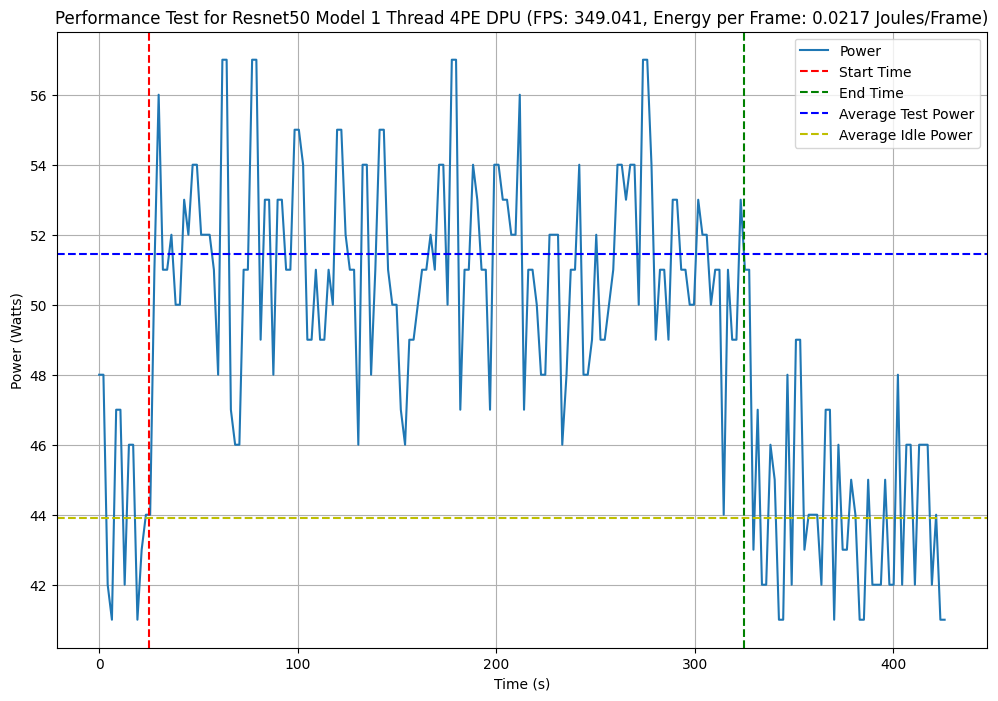

Average Power per Frame 0.021653268343625003 Joules/Frame
e2e 11459.2
dpu 1.02624


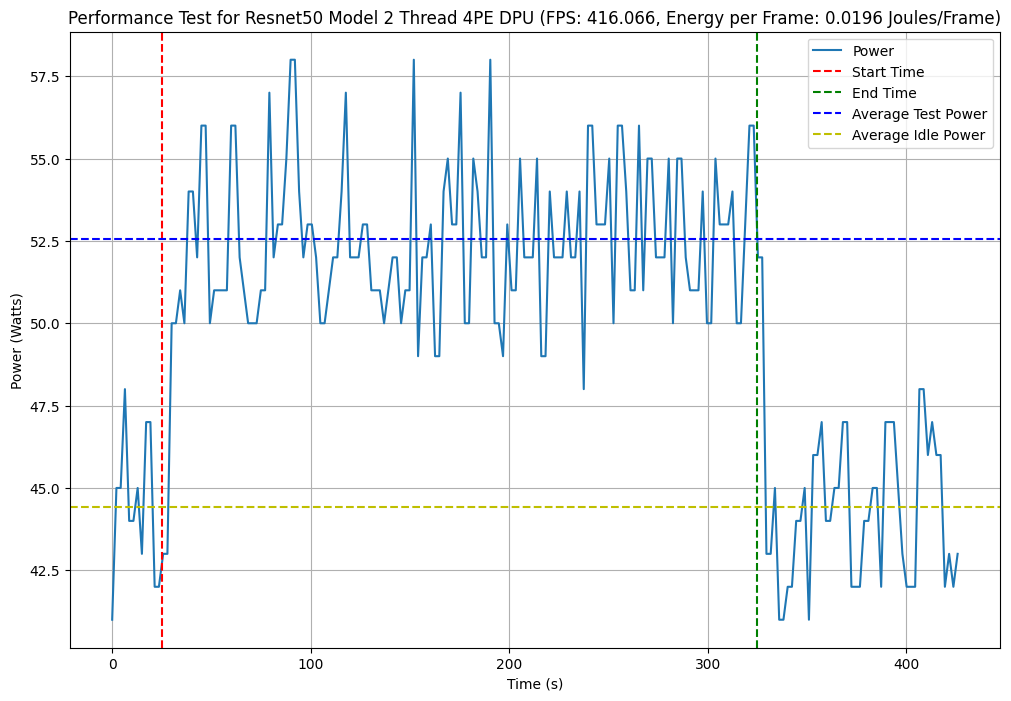

Average Power per Frame 0.01956641833077948 Joules/Frame
e2e 0
dpu 0


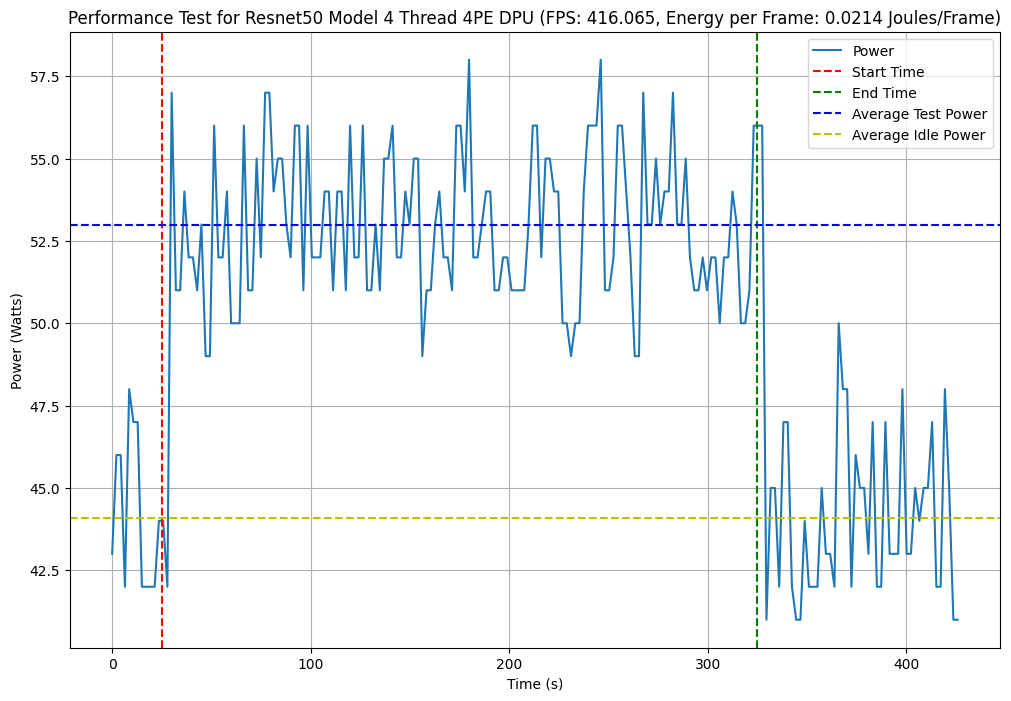

Average Power per Frame 0.02137907114644744 Joules/Frame
e2e 0
dpu 0


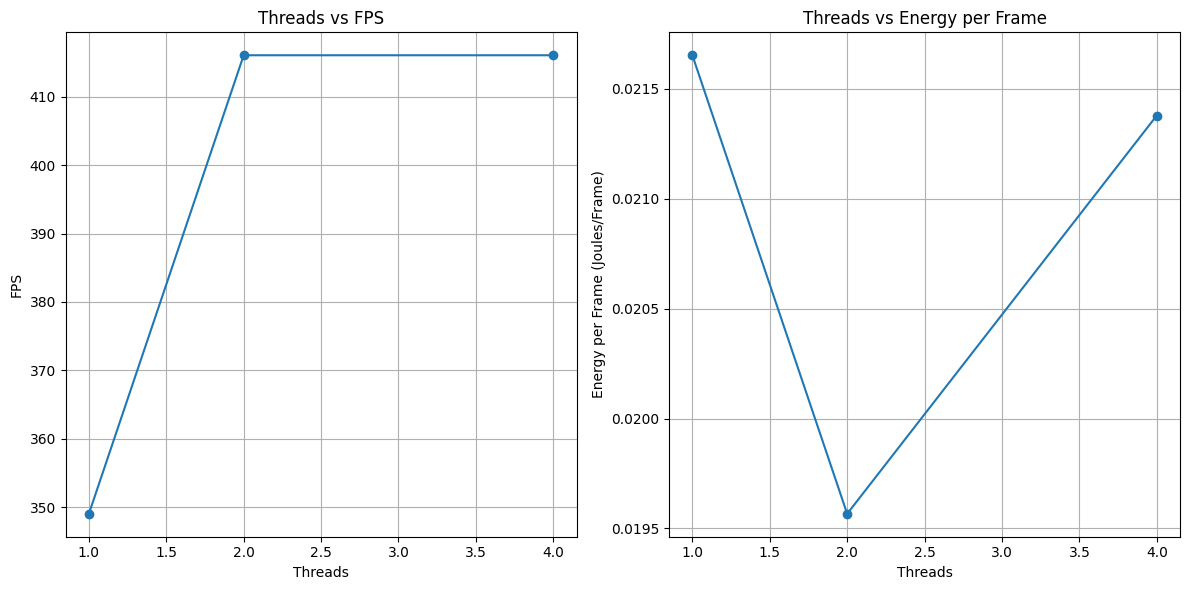

In [9]:
# threads = [1,2,4,8]
threads = [1,2,4]
fps_list_4PE_resnet = []
energy_per_frame_list_4PE_resnet = []


# TEST INFO
file_path = 'data/tf_resnet50_300_1_4PE.csv'
model_description = 'Resnet50 Model 1 Thread 4PE DPU'
# RESULTS
fps = 349.041
e2e_mean = 11459.2
dpu_mean = 1.02624
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE_resnet.append(fps)
energy_per_frame_list_4PE_resnet.append(energy_per_frame)



# TEST INFO
file_path = 'data/tf_resnet50_300_2_4PE.csv'
model_description = 'Resnet50 Model 2 Thread 4PE DPU'
# RESULTS
fps = 416.066
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE_resnet.append(fps)
energy_per_frame_list_4PE_resnet.append(energy_per_frame)


# TEST INFO
file_path = 'data/tf_resnet50_300_4_4PE.csv'
model_description = 'Resnet50 Model 4 Thread 4PE DPU'
# RESULTS
fps = 416.065
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE_resnet.append(fps)
energy_per_frame_list_4PE_resnet.append(energy_per_frame)


# # TEST INFO
# file_path = 'data/tf_resnet50_300_8_4PE.csv'
# model_description = 'YOLOv3 Model 8 Thread 4PE DPU'
# # RESULTS
# fps = 274.01
# e2e_mean = 0
# dpu_mean = 0
# energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
# fps_list_4PE.append(fps)
# energy_per_frame_list_4PE.append(energy_per_frame)




# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_4PE_resnet, marker='o', linestyle='-')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_4PE_resnet, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# VGG 16

## DPU: 4PE

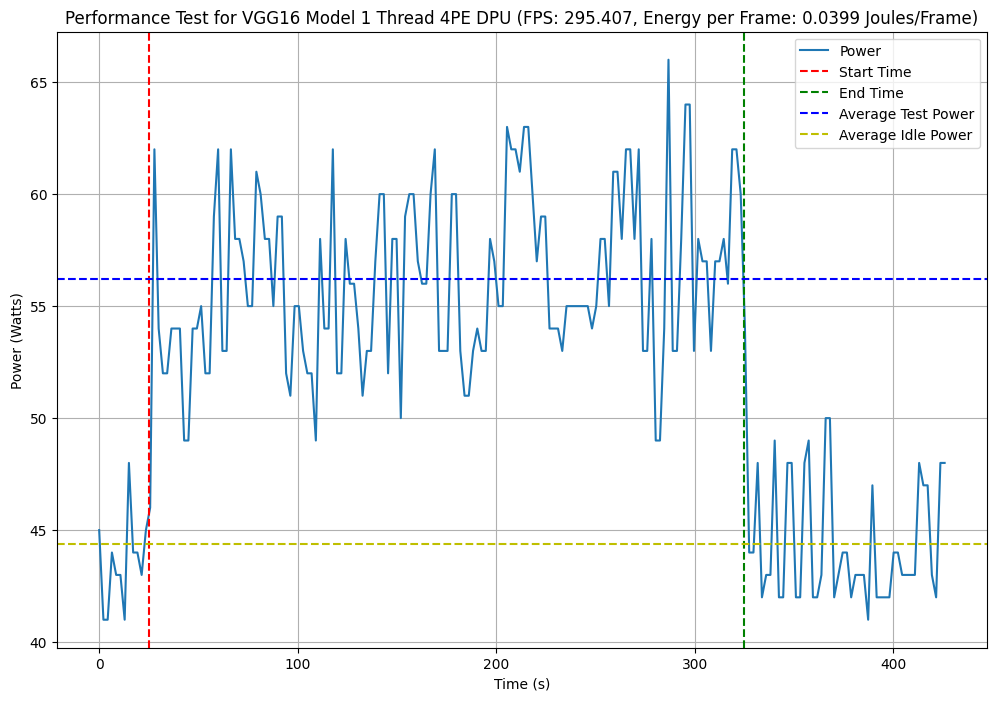

Average Power per Frame 0.039945675925205454 Joules/Frame
e2e 13539.6
dpu 1.03448


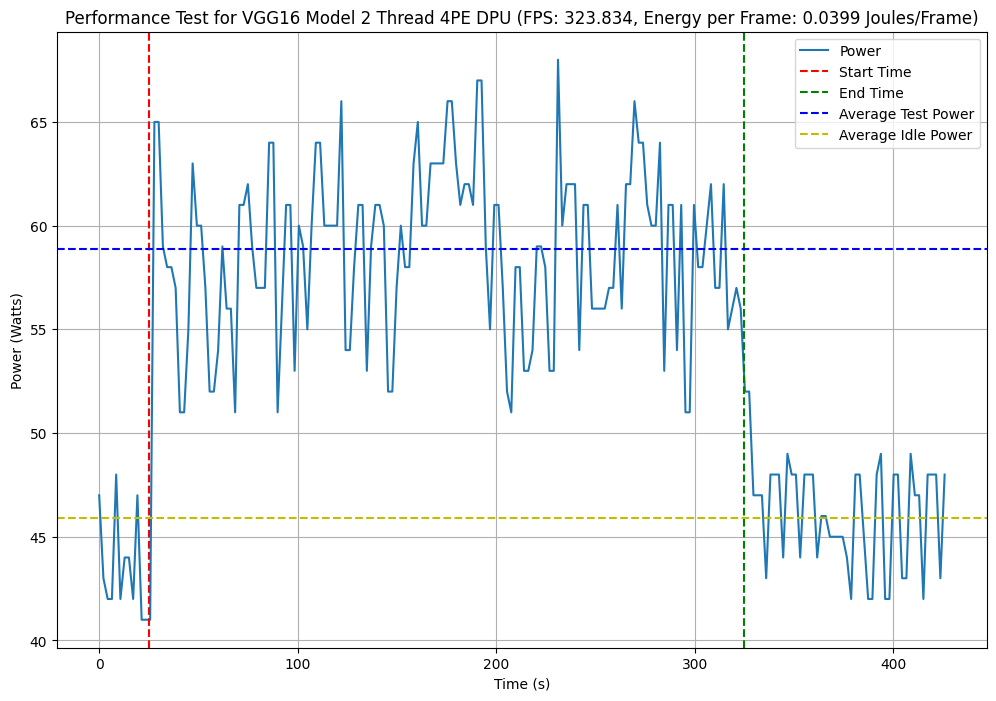

Average Power per Frame 0.03992883263909957 Joules/Frame
e2e 0
dpu 0


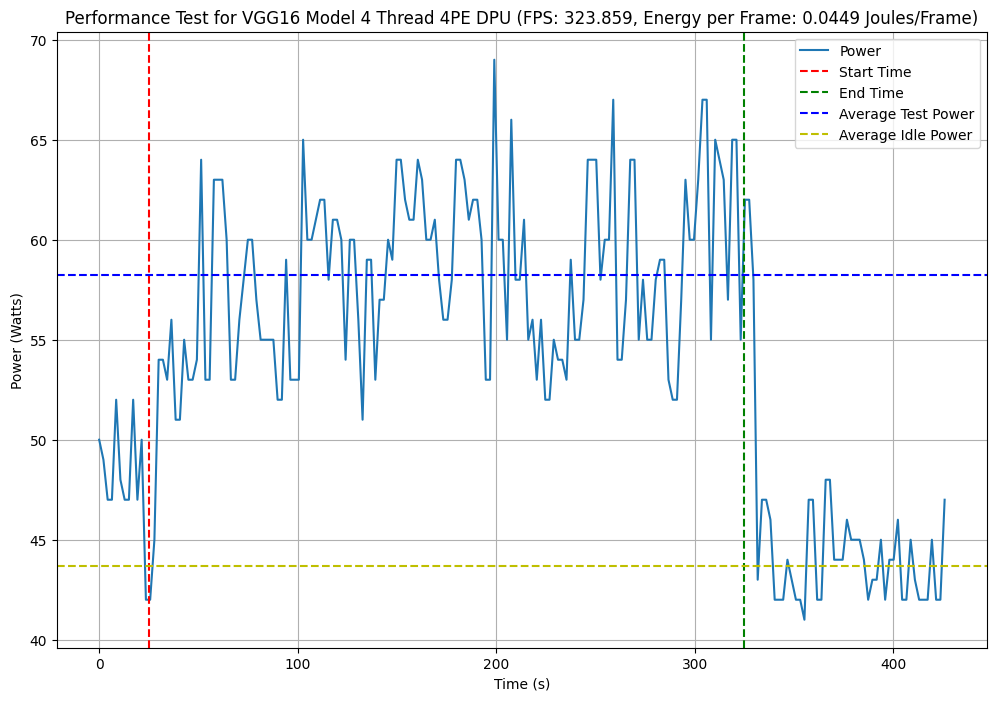

Average Power per Frame 0.04491661859265148 Joules/Frame
e2e 0
dpu 0


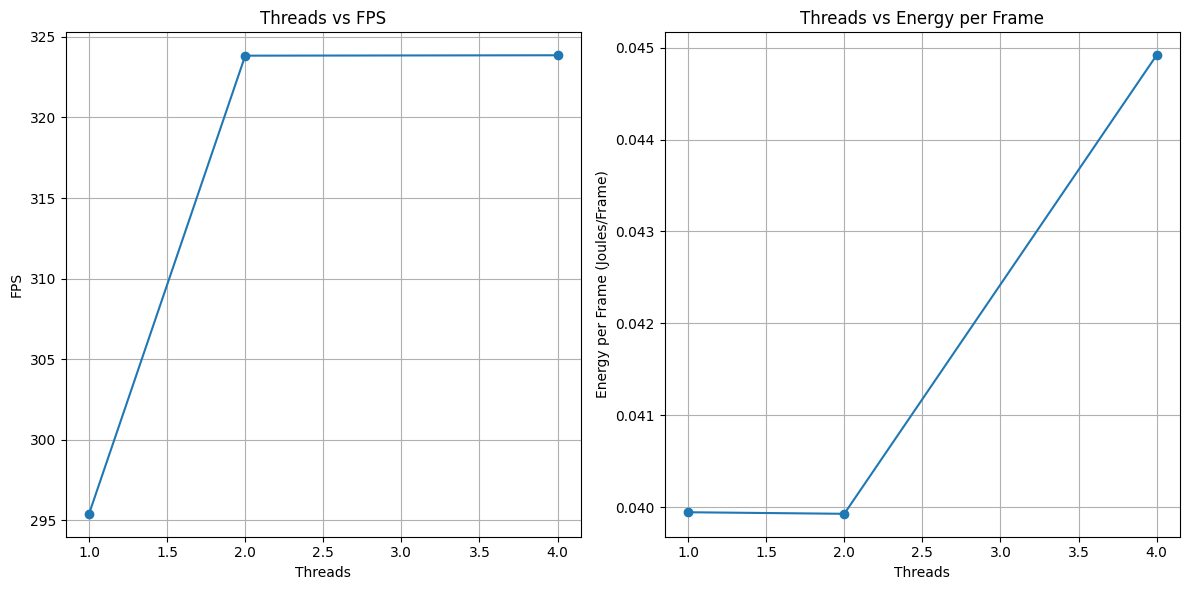

In [10]:
# threads = [1,2,4,8]
threads = [1,2,4]
fps_list_4PE_vgg = []
energy_per_frame_list_4PE_vgg = []


# TEST INFO
file_path = 'data/tf_vgg16_300_1_4PE.csv'
model_description = 'VGG16 Model 1 Thread 4PE DPU'
# RESULTS
fps = 295.407
e2e_mean = 13539.6
dpu_mean = 1.03448
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE_vgg.append(fps)
energy_per_frame_list_4PE_vgg.append(energy_per_frame)



# TEST INFO
file_path = 'data/tf_vgg16_300_2_4PE.csv'
model_description = 'VGG16 Model 2 Thread 4PE DPU'
# RESULTS
fps = 323.834
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE_vgg.append(fps)
energy_per_frame_list_4PE_vgg.append(energy_per_frame)

# TEST INFO
file_path = 'data/tf_vgg16_300_4_4PE.csv'
model_description = 'VGG16 Model 4 Thread 4PE DPU'
# RESULTS
fps = 323.859
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_4PE_vgg.append(fps)
energy_per_frame_list_4PE_vgg.append(energy_per_frame)


# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_4PE_vgg, marker='o', linestyle='-')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_4PE_vgg, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# VGG 16

## DPU: 6PEDWC

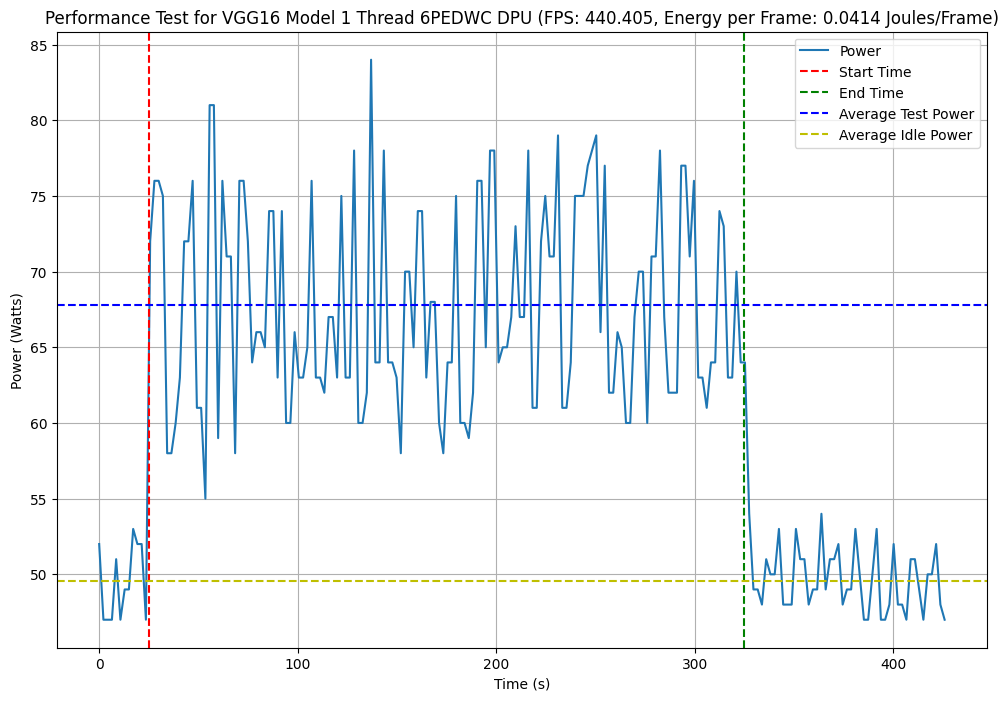

Average Power per Frame 0.04136243105307335 Joules/Frame
e2e 13622.8
dpu 1.0312


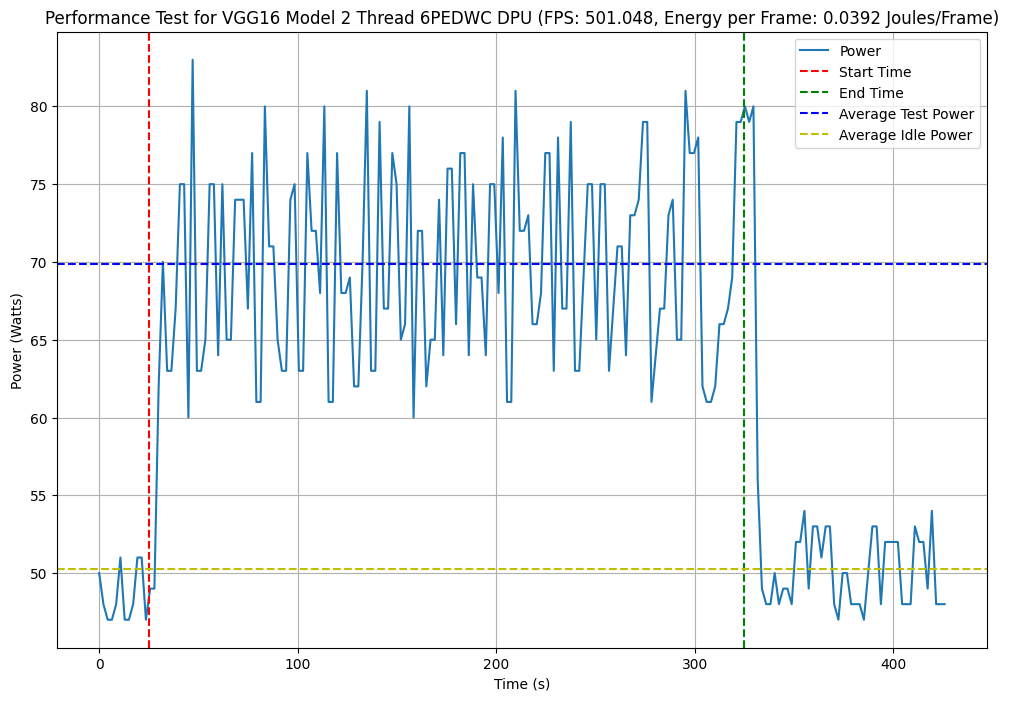

Average Power per Frame 0.03922363318045577 Joules/Frame
e2e 0
dpu 0


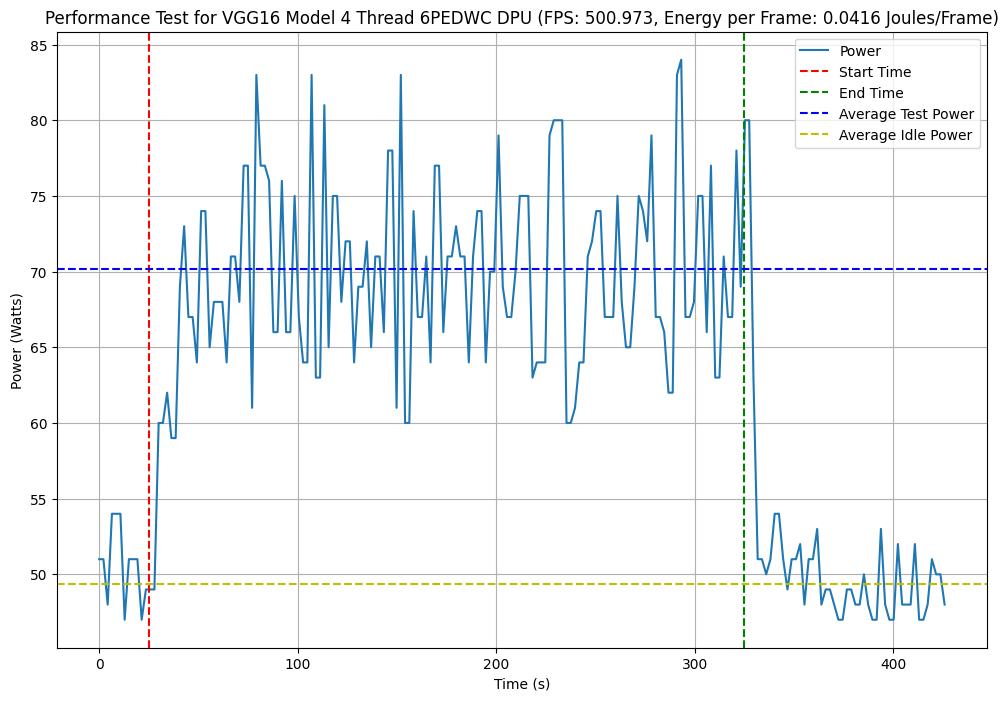

Average Power per Frame 0.04155367004628197 Joules/Frame
e2e 0
dpu 0


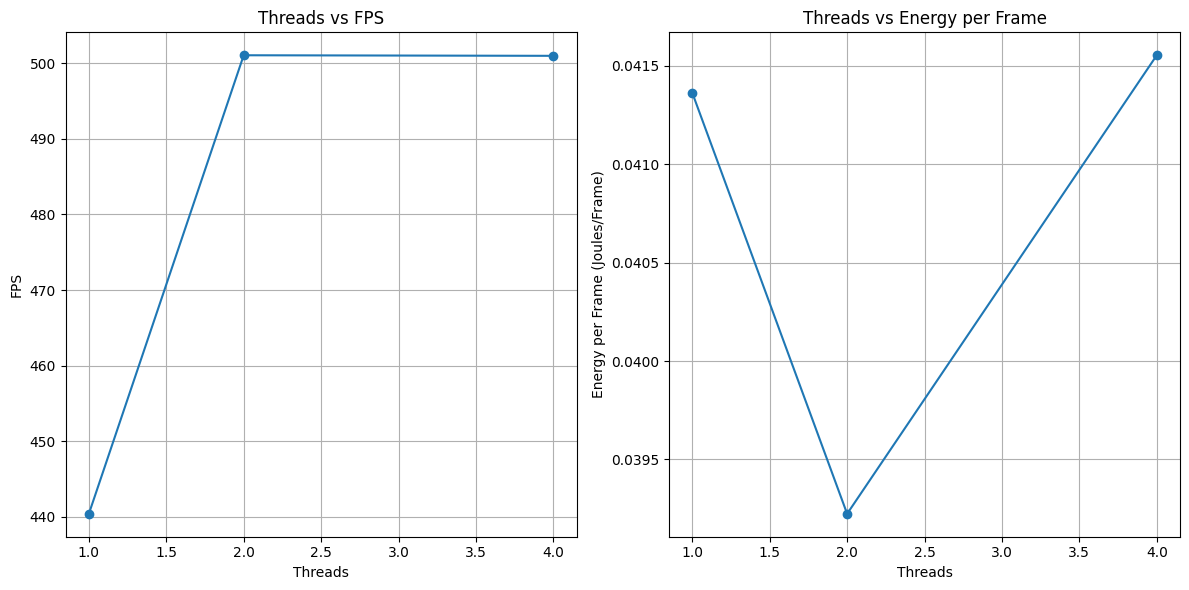

In [11]:
# threads = [1,2,4,8]
threads = [1,2,4]
fps_list_6PEDWC_vgg = []
energy_per_frame_list_6PEDWC_vgg = []


# TEST INFO
file_path = 'data/tf_vgg16_300_1_6PEDWC.csv'
model_description = 'VGG16 Model 1 Thread 6PEDWC DPU'
# RESULTS
fps = 440.405
e2e_mean = 13622.8
dpu_mean = 1.0312
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEDWC_vgg.append(fps)
energy_per_frame_list_6PEDWC_vgg.append(energy_per_frame)



# TEST INFO
file_path = 'data/tf_vgg16_300_2_6PEDWC.csv'
model_description = 'VGG16 Model 2 Thread 6PEDWC DPU'
# RESULTS
fps = 501.048
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEDWC_vgg.append(fps)
energy_per_frame_list_6PEDWC_vgg.append(energy_per_frame)

# TEST INFO
file_path = 'data/tf_vgg16_300_4_6PEDWC.csv'
model_description = 'VGG16 Model 4 Thread 6PEDWC DPU'
# RESULTS
fps = 500.973
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEDWC_vgg.append(fps)
energy_per_frame_list_6PEDWC_vgg.append(energy_per_frame)


# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_6PEDWC_vgg, marker='o', linestyle='-')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_6PEDWC_vgg, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# VGG 16

## DPU: 6PEMISC

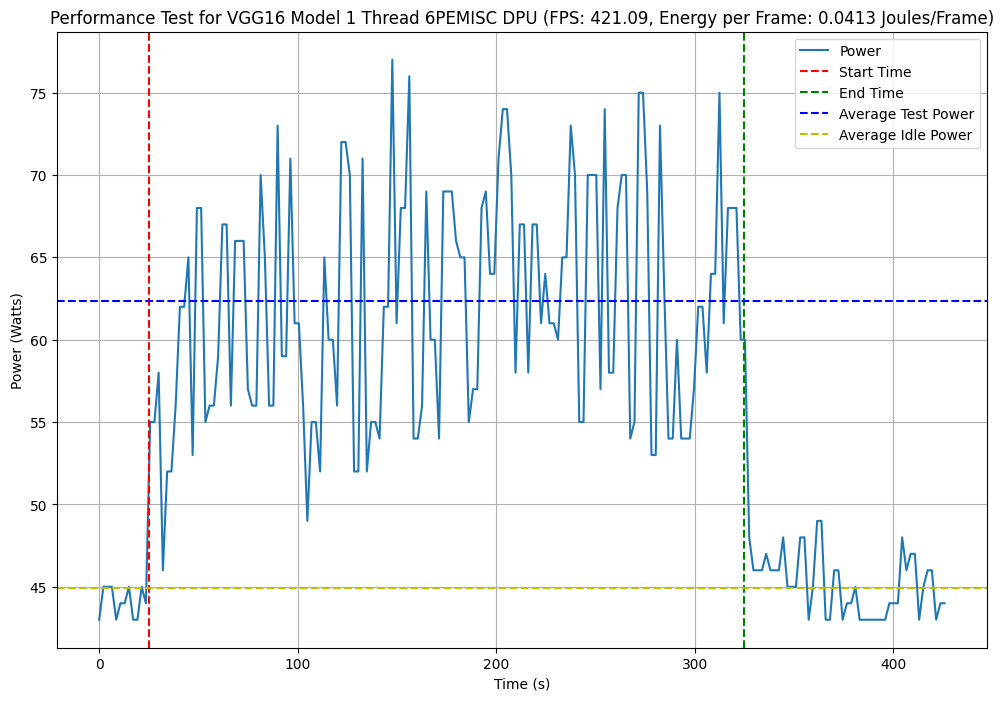

Average Power per Frame 0.041278856826659896 Joules/Frame
e2e 14228.5
dpu 1.02443


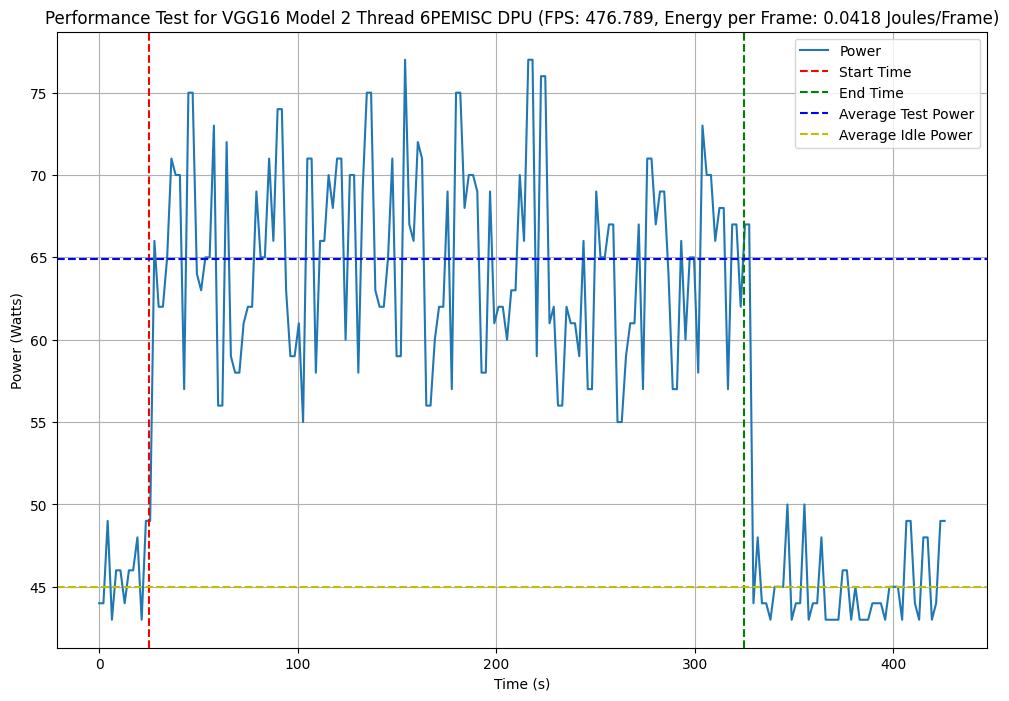

Average Power per Frame 0.041764173277274476 Joules/Frame
e2e 0
dpu 0


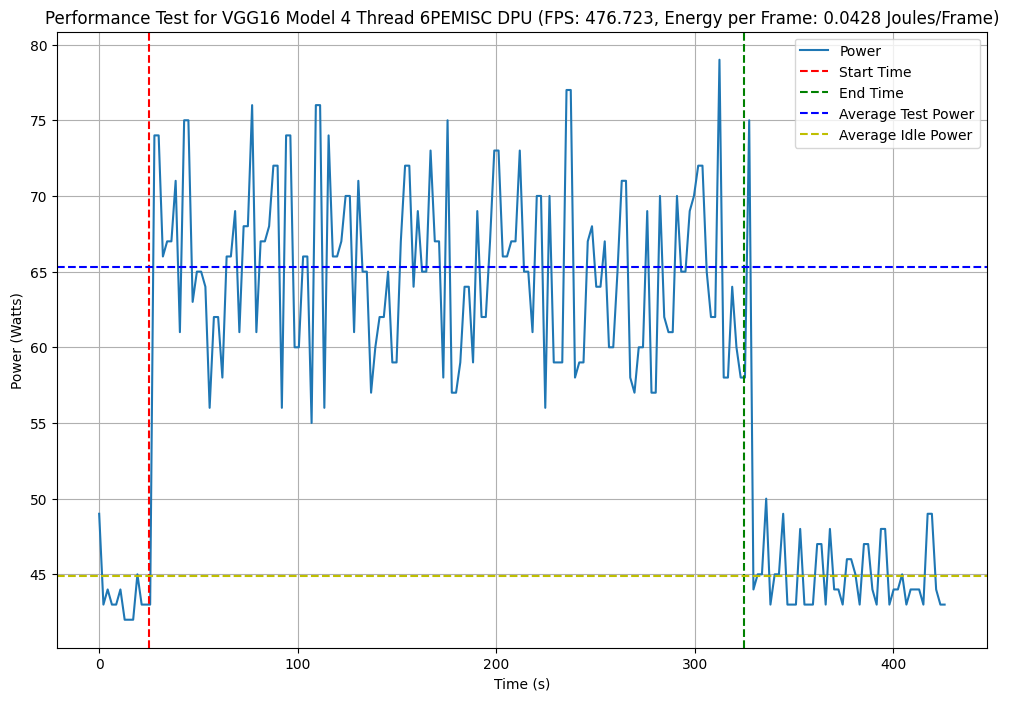

Average Power per Frame 0.04282487317197407 Joules/Frame
e2e 0
dpu 0


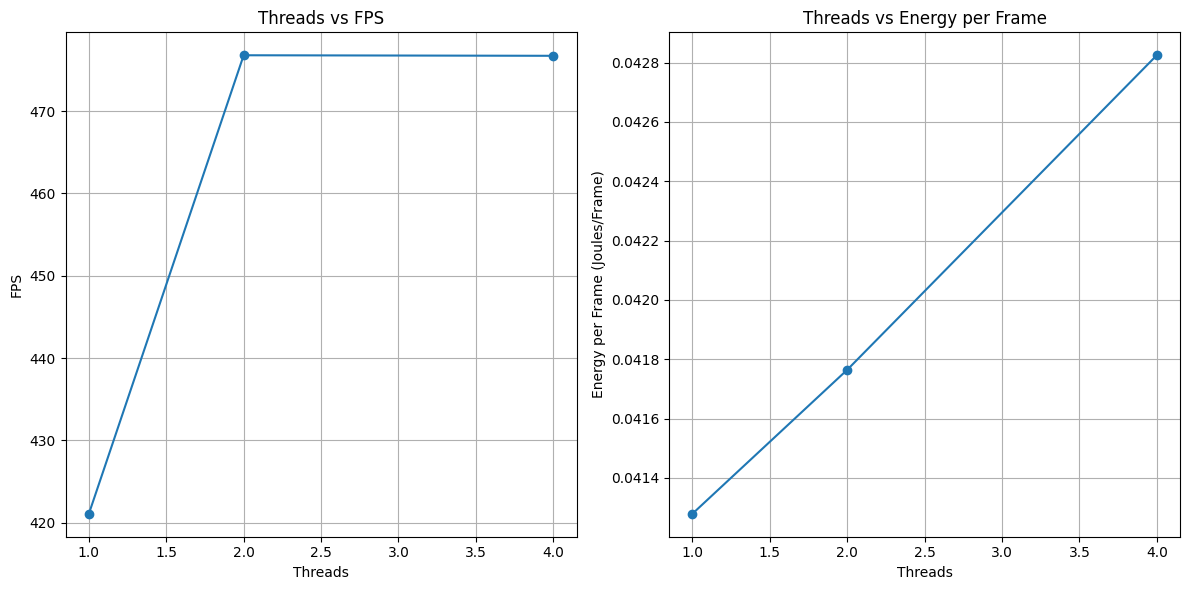

In [12]:
# threads = [1,2,4,8]
threads = [1,2,4]
fps_list_6PEMISC_vgg = []
energy_per_frame_list_6PEMISC_vgg = []


# TEST INFO
file_path = 'data/tf_vgg16_300_1_6PEMISC.csv'
model_description = 'VGG16 Model 1 Thread 6PEMISC DPU'
# RESULTS
fps = 421.09
e2e_mean = 14228.5
dpu_mean = 1.02443
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEMISC_vgg.append(fps)
energy_per_frame_list_6PEMISC_vgg.append(energy_per_frame)



# TEST INFO
file_path = 'data/tf_vgg16_300_2_6PEMISC.csv'
model_description = 'VGG16 Model 2 Thread 6PEMISC DPU'
# RESULTS
fps = 476.789
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEMISC_vgg.append(fps)
energy_per_frame_list_6PEMISC_vgg.append(energy_per_frame)

# TEST INFO
file_path = 'data/tf_vgg16_300_4_6PEMISC.csv'
model_description = 'VGG16 Model 4 Thread 6PEMISC DPU'
# RESULTS
fps = 476.723
e2e_mean = 0
dpu_mean = 0
energy_per_frame = process_and_plot(file_path, model_description, fps, e2e_mean, dpu_mean)
fps_list_6PEMISC_vgg.append(fps)
energy_per_frame_list_6PEMISC_vgg.append(energy_per_frame)



# Plotting threads vs FPS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(threads, fps_list_6PEMISC_vgg, marker='o', linestyle='-')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(1, 2, 2)
plt.plot(threads, energy_per_frame_list_6PEMISC_vgg, marker='o', linestyle='-')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

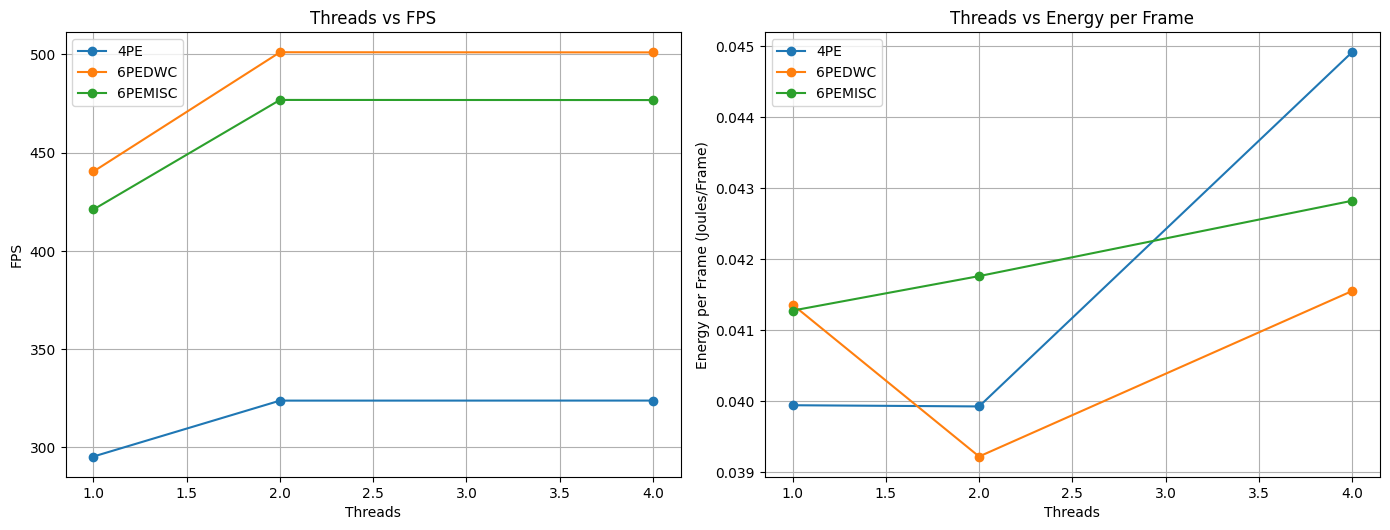

In [13]:
plt.figure(figsize=(14, 10))

# Plotting threads vs FPS
plt.subplot(2, 2, 1)
plt.plot(threads, fps_list_4PE_vgg, marker='o', linestyle='-', label='4PE')
plt.plot(threads, fps_list_6PEDWC_vgg, marker='o', linestyle='-', label='6PEDWC')
plt.plot(threads, fps_list_6PEMISC_vgg, marker='o', linestyle='-', label='6PEMISC')
plt.title('Threads vs FPS')
plt.xlabel('Threads')
plt.ylabel('FPS')
plt.legend()
plt.grid(True)

# Plotting threads vs energy per frame
plt.subplot(2, 2, 2)
plt.plot(threads, energy_per_frame_list_4PE_vgg, marker='o', linestyle='-', label='4PE')
plt.plot(threads, energy_per_frame_list_6PEDWC_vgg, marker='o', linestyle='-', label='6PEDWC')
plt.plot(threads, energy_per_frame_list_6PEMISC_vgg, marker='o', linestyle='-', label='6PEMISC')
plt.title('Threads vs Energy per Frame')
plt.xlabel('Threads')
plt.ylabel('Energy per Frame (Joules/Frame)')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
